In [71]:
import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf

# Get the current datetime
start = datetime.datetime.now()

# Subtract 7 years using relativedelta
end = (start - relativedelta(years=9)).date()

# Download Netflix stock data
data = yf.download('NFLX', start=end, end=start.date())


[*********************100%%**********************]  1 of 1 completed


In [72]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-23,124.300003,126.199997,121.660004,125.029999,125.029999,15727000
2015-11-24,123.669998,124.660004,120.029999,123.309998,123.309998,18335300
2015-11-25,124.230003,125.199997,122.360001,124.160004,124.160004,10980700
2015-11-27,123.849998,126.389999,123.589996,125.440002,125.440002,6645500
2015-11-30,126.029999,126.599998,122.889999,123.330002,123.330002,13894000
...,...,...,...,...,...,...
2024-11-14,833.669983,841.000000,830.020020,837.260010,837.260010,3038200
2024-11-15,832.039978,832.039978,816.489990,823.960022,823.960022,3673700
2024-11-18,815.500000,848.450012,809.330017,847.049988,847.049988,4084100


In [73]:
data[data['Close'] == data['Adj Close']].shape

(2264, 6)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

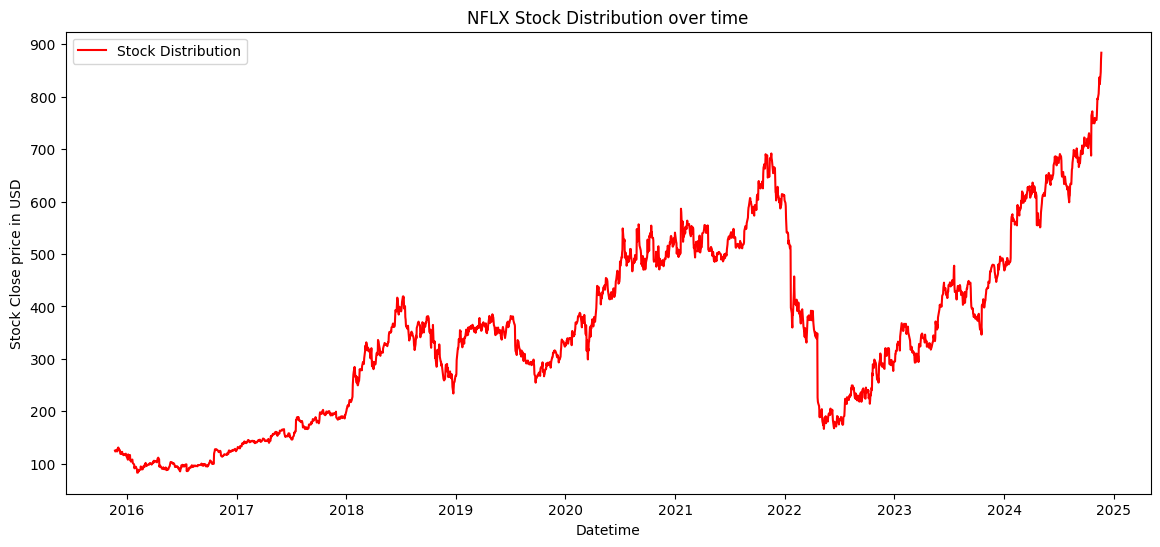

In [75]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'], color='red', label = 'Stock Distribution')
plt.title('NFLX Stock Distribution over time')
plt.xlabel('Datetime')
plt.ylabel('Stock Close price in USD')
plt.legend()
plt.show()

In [76]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Ohlc(x = data.index,
  open=data['Open'],
  high=data['High'],
  low=data['Low'],
  close=data['Close'], name= 'OHLC')])

fig.show()

Preprocessing of the data

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-11-23 to 2024-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [78]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,353.701413,358.883215,348.411259,353.795782,353.795782,7.963295e+06
std,172.218839,174.159067,170.275290,172.290496,172.290496,6.614558e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.144000e+06
25%,197.397499,200.205006,194.207500,197.365002,197.365002,4.100875e+06
50%,347.820007,352.910004,341.735001,347.674988,347.674988,6.115100e+06
75%,488.627502,494.212494,481.872505,487.835007,487.835007,9.501375e+06
max,879.979980,890.599976,868.400024,883.849976,883.849976,1.333875e+08


In [79]:
data.drop('Adj Close' , axis = 1, inplace=True)

In [80]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-23,124.300003,126.199997,121.660004,125.029999,15727000
2015-11-24,123.669998,124.660004,120.029999,123.309998,18335300
2015-11-25,124.230003,125.199997,122.360001,124.160004,10980700
2015-11-27,123.849998,126.389999,123.589996,125.440002,6645500
2015-11-30,126.029999,126.599998,122.889999,123.330002,13894000
...,...,...,...,...,...
2024-11-14,833.669983,841.000000,830.020020,837.260010,3038200
2024-11-15,832.039978,832.039978,816.489990,823.960022,3673700
2024-11-18,815.500000,848.450012,809.330017,847.049988,4084100


In [81]:
#Min Max sclaing 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
nflx_data = scaler.fit_transform(data)

In [82]:
train_size = int(len(nflx_data)*0.8)
train_data = nflx_data[:train_size]
test_data = nflx_data[train_size:]

In [83]:
train_data

array([[0.05470285, 0.05149522, 0.05290127, 0.05273013, 0.11027385],
       [0.05391476, 0.04958433, 0.05083392, 0.05058297, 0.12999732],
       [0.05461528, 0.05025438, 0.05378908, 0.05164408, 0.07438324],
       ...,
       [0.33701107, 0.33658025, 0.34087131, 0.33838913, 0.03415442],
       [0.34186462, 0.34829386, 0.3423933 , 0.34853818, 0.05188308],
       [0.35600006, 0.35192954, 0.3531993 , 0.35465511, 0.05076242]])

In [84]:
import numpy as np
def preprocess_hist_values(dataset, step=1):
  x_data, y_data = [], []
  for i in range(len(dataset) - step - 1):
    z = dataset[i:i+step]
    x_data.append(z)
    y_data.append(dataset[i+step,3])
  return np.array(x_data), np.array(y_data)


Since I will be using LSTM, and the LSTM works better with np.array

In [85]:
x_train, y_train = preprocess_hist_values(train_data, 100)
x_test, y_test = preprocess_hist_values(test_data, 100)

In [86]:
x_train[1]

array([[0.05391476, 0.04958433, 0.05083392, 0.05058297, 0.12999732],
       [0.05461528, 0.05025438, 0.05378908, 0.05164408, 0.07438324],
       [0.05413993, 0.05173099, 0.0553491 , 0.05324196, 0.04160129],
       [0.05686694, 0.05199157, 0.05446129, 0.05060795, 0.09641306],
       [0.0549155 , 0.05071349, 0.05386518, 0.05315457, 0.08625604],
       [0.05624148, 0.05788561, 0.05704864, 0.05759867, 0.17363197],
       [0.06135775, 0.05894032, 0.05890038, 0.05495219, 0.19285107],
       [0.05808034, 0.0574389 , 0.05808866, 0.06009537, 0.14447893],
       [0.0633217 , 0.06026803, 0.05428372, 0.05314209, 0.16792961],
       [0.05121277, 0.05402657, 0.05219101, 0.05516441, 0.13193163],
       [0.05895598, 0.05469662, 0.05375103, 0.051694  , 0.12586479],
       [0.05495303, 0.05026679, 0.05285054, 0.05008364, 0.09323785],
       [0.05113771, 0.04752451, 0.04902023, 0.04509026, 0.11313448],
       [0.04903616, 0.04491873, 0.04402309, 0.04728734, 0.13259858],
       [0.05173816, 0.04789677, 0.

In [87]:
y_train[0]

0.014418390367232414

In [89]:
y_train.shape

(1710,)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
  LSTM(50, return_sequences=True, input_shape=x_train.shape[1:]),
  LSTM(50),
  Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs = 20, batch_size=32)

Epoch 1/20
54/54 [==============================] - 19s 109ms/step - loss: 0.0077
Epoch 2/20
54/54 [==============================] - 6s 109ms/step - loss: 7.6101e-04
Epoch 3/20
54/54 [==============================] - 6s 102ms/step - loss: 6.8425e-04
Epoch 4/20
54/54 [==============================] - 6s 108ms/step - loss: 6.9019e-04
Epoch 5/20
54/54 [==============================] - 6s 111ms/step - loss: 6.5154e-04
Epoch 6/20
54/54 [==============================] - 6s 102ms/step - loss: 5.9165e-04
Epoch 7/20
54/54 [==============================] - 6s 106ms/step - loss: 5.6717e-04
Epoch 8/20
54/54 [==============================] - 6s 117ms/step - loss: 4.9272e-04
Epoch 9/20
54/54 [==============================] - 6s 111ms/step - loss: 4.7790e-04
Epoch 10/20
54/54 [==============================] - 8s 149ms/step - loss: 4.2602e-04
Epoch 11/20
54/54 [==============================] - 6s 110ms/step - loss: 4.2943e-04
Epoch 12/20
54/54 [==============================] - 5s 98ms/step 

In [96]:
test_predict = model.predict(x_test)


11/11 [==============================] - 1s 42ms/step


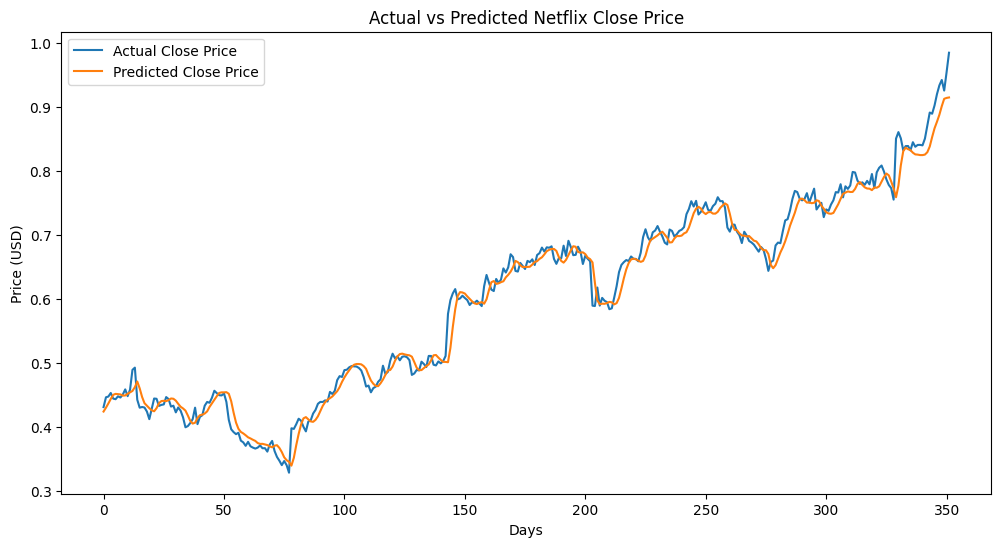

In [97]:
# Visualize actual vs predicted on test data
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Close Price')
plt.plot(test_predict, label='Predicted Close Price')
plt.title('Actual vs Predicted Netflix Close Price')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [98]:
# Prepare a placeholder array for test predictions
test_placeholder = np.zeros((test_predict.shape[0], 5))  # 5 features
test_placeholder[:, close_index] = test_predict.ravel()  # Fill only the 'Close' column

# Inverse transform
test_predict = scaler.inverse_transform(test_placeholder)[:, close_index]

# For actual values (y_test)
test_actual_placeholder = np.zeros((y_test.shape[0], 5))  # 5 features
test_actual_placeholder[:, close_index] = y_test.ravel()  # Fill only the 'Close' column

y_test_actual = scaler.inverse_transform(test_actual_placeholder)[:, close_index]


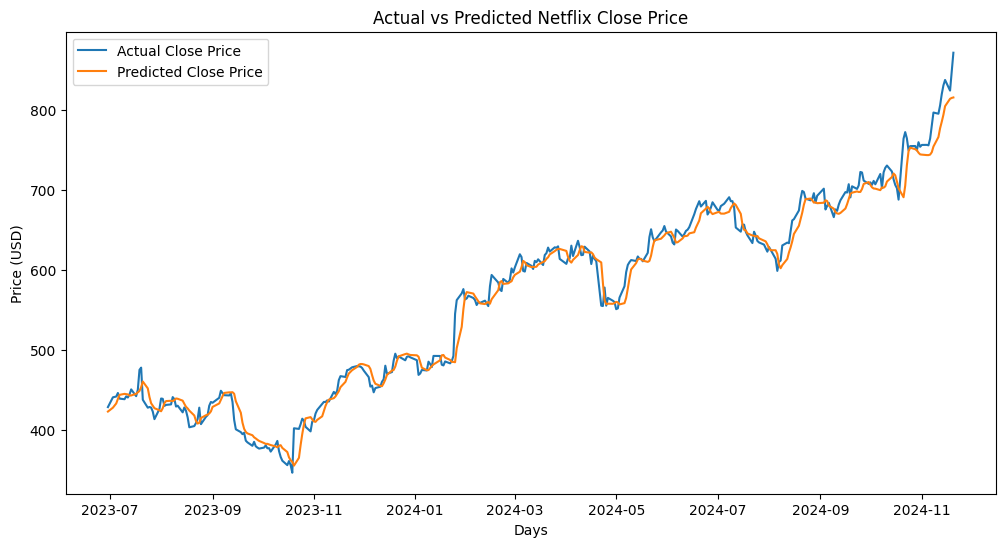

In [104]:
# Visualize actual vs predicted on test data
plt.figure(figsize=(12,6))
plt.plot(data[train_size + 101:].index, y_test_actual, label='Actual Close Price')
plt.plot(data[train_size + 101:].index, test_predict, label='Predicted Close Price')
plt.title('Actual vs Predicted Netflix Close Price')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()